Michael Russo

661624457

Project: Introduction to Machine Learning Applications Section 2 Fall 2020

Allstate Kaggle Competition

Analysis for this code is peformed in the Kaggle online jupiter notebooks enviroment.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/allstate-claims-severity/sample_submission.csv
/kaggle/input/allstate-claims-severity/train.csv.zip
/kaggle/input/allstate-claims-severity/sample_submission.csv.zip
/kaggle/input/allstate-claims-severity/train.csv
/kaggle/input/allstate-claims-severity/test.csv
/kaggle/input/allstate-claims-severity/test.csv.zip


import given Kaggle Test and Train data sets and sample sumbission file three times.

In [2]:
train_data = pd.read_csv("../input/allstate-claims-severity/train.csv")
test_data = pd.read_csv("../input/allstate-claims-severity/test.csv")
sample_submission = pd.read_csv("../input/allstate-claims-severity/sample_submission.csv")
sample_submission2 = sample_submission
sample_submission3= sample_submission

In [3]:
print("Train data dimensions: ", train_data.shape)
print("Test data dimensions: ", test_data.shape)

Train data dimensions:  (188318, 132)
Test data dimensions:  (125546, 131)


In [4]:
#train_data.drop('id',axis=1,inplace=True)
train_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [5]:
test_data.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [6]:
table1 = train_data.describe() # describe the value range, standard deviation and averages.
table1


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [7]:

#table1.to_csv('calls.csv') # export for report


In [8]:
#train_data.skew()

Select continious features for analysis

In [9]:
contFeatureslist = [] # to investigate continuous data features, matrix with just continuous varaibel columns and loss 
for colName,x in train_data.iloc[1,:].iteritems():
    if(not str(x).isalpha()):
        contFeatureslist.append(colName)

print(contFeatureslist)

#contFeatureslist = ['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']

['id', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13', 'cont14', 'loss']


In [10]:
contFeatureslist.remove("id")
contFeatureslist.remove("loss")

In [11]:

train_data_simple=train_data[contFeatureslist] # investigate continous data 
#data=pd.melt(df))
train_data_simple.head()


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


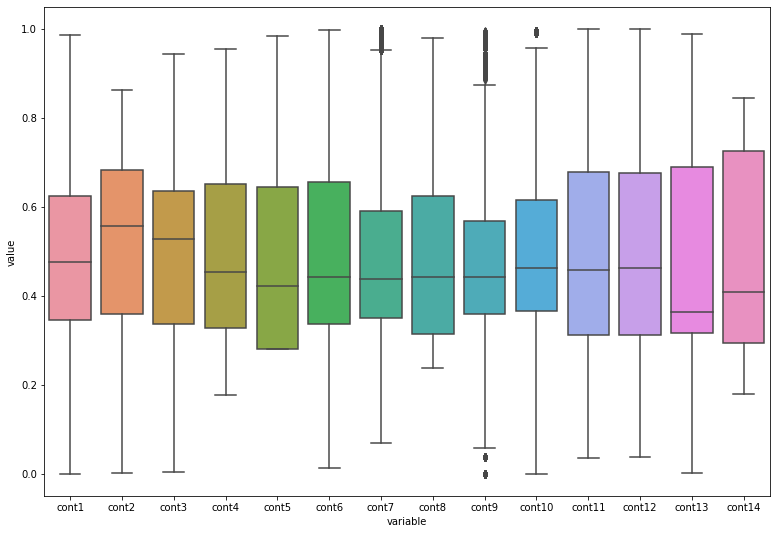

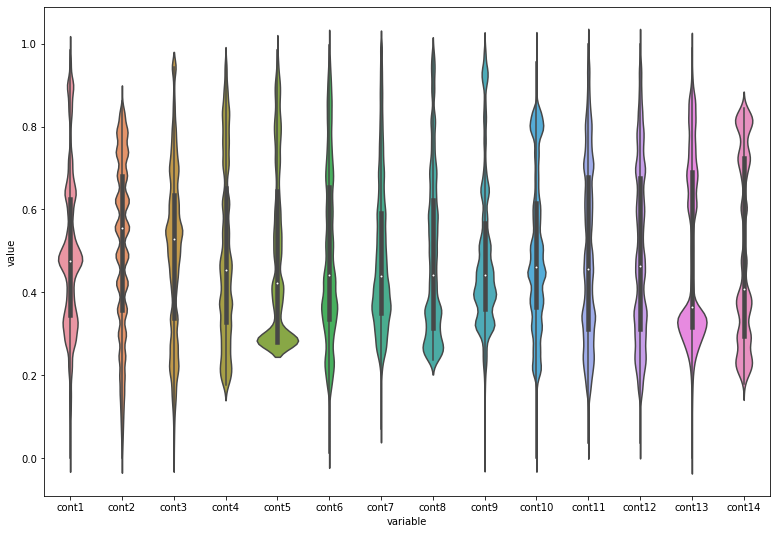

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(13,9)) # plot contious data as box plots to investigate skew, avarage, and range
sns.boxplot(x="variable", y="value", data=pd.melt(train_data_simple))


plt.figure(figsize=(13,9)) # plot contious data as violin plots to better investigate skew, avarage, and range
sns.violinplot(x="variable", y="value", data=pd.melt(train_data_simple))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2996db82d0>,
      dtype=object)

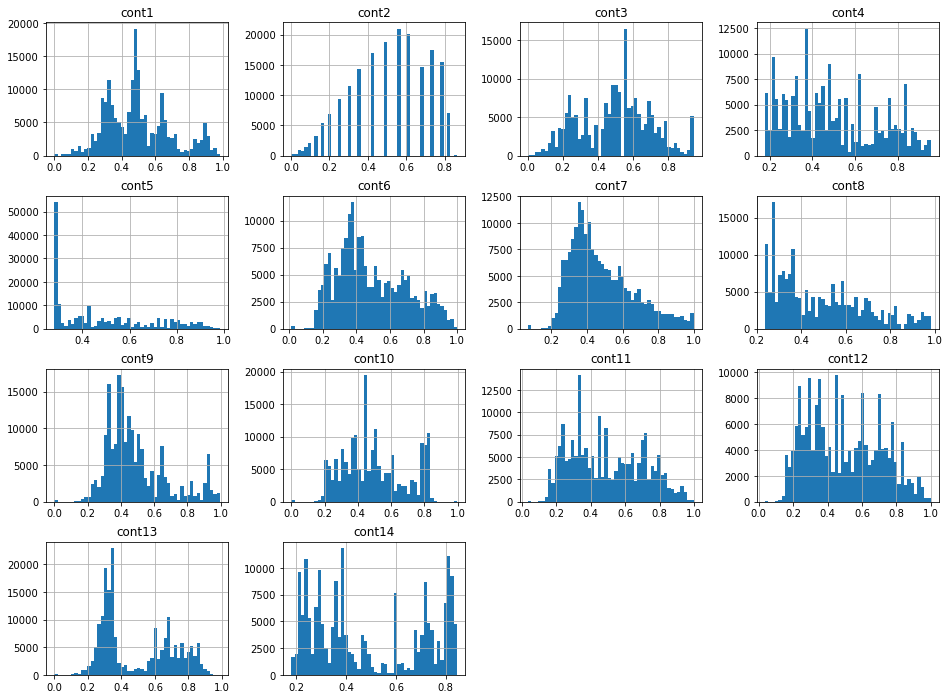

In [13]:
train_data[contFeatureslist].hist(bins=50, figsize=(16,12)) # further investigate distribution of continous data

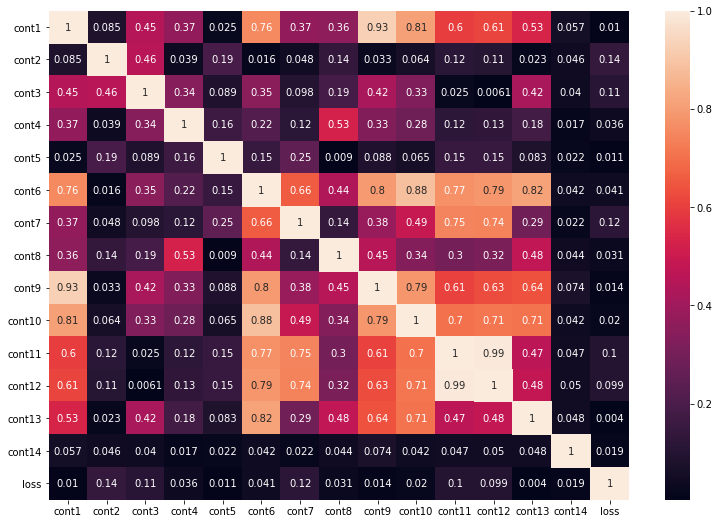

In [14]:
contFeatureslist.append("loss")

correlationMatrix = train_data[contFeatureslist].corr().abs() # investigate continous data coorelation between varables

plt.subplots(figsize=(13, 9))
sns.heatmap(correlationMatrix,annot=True)

# Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar=False)
plt.show()

In [15]:
s = correlationMatrix.unstack()  # list continuous varibles with most correlation

so = s.sort_values(kind="quicksort",ascending=False)

print("Top 5 most correlated continuous feature pairs: \n")
print(so[so != 1.0][0:10])


Top 5 most correlated continuous feature pairs: 

cont12  cont11    0.994384
cont11  cont12    0.994384
cont1   cont9     0.929912
cont9   cont1     0.929912
cont6   cont10    0.883351
cont10  cont6     0.883351
cont13  cont6     0.815091
cont6   cont13    0.815091
cont1   cont10    0.808551
cont10  cont1     0.808551
dtype: float64


Now that we have the top 5 most correlated continuous feature pairs, we can look to remove features if needed.

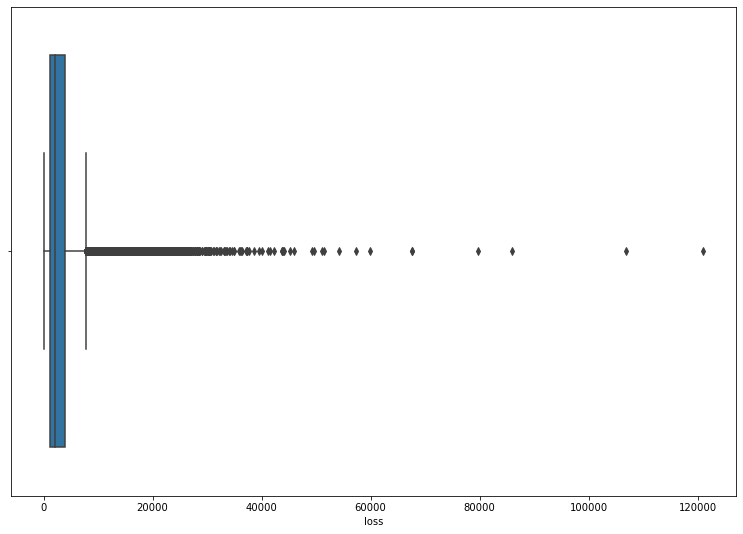

In [16]:
plt.figure(figsize=(13,9)) # investigate loss dependent variable - seen that skew is high and positive
#sns.distplot(train_data["loss"])
sns.boxplot(train_data["loss"])


Here, we can see loss is highly right skewed data. This happened because there are many outliers in the data that we can see from box plot.

logarithm on loss function Log(1+x) - This mathematical function helps user to calculate natural logarithmic value of x+1 where x belongs to all the input array elements.
It is used to get a normal distribution so that we can train model using target feature as log of loss. This way we don't have to remove outliers and algorithems can predict better.

Figure below shows skew correction.

In [17]:
train_data["logloss"] = np.log1p(train_data["loss"]) # normalize the loss dependent varable so that model can predict better

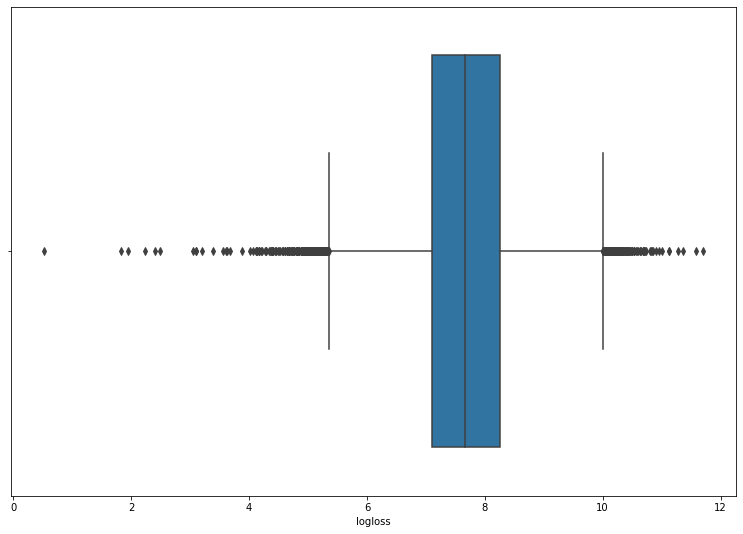

In [18]:
plt.figure(figsize=(13,9)) #Plot shows that skew is corrected to a large extent
#sns.distplot(np.log1p(train_data["loss"]))
sns.boxplot(train_data["logloss"])

Next we analize the Catagorial columns, Select Catagorial features for analysis with similar method as above

In [19]:
catCount = sum(str(x).isalpha() for x in train_data.iloc[1,:]) # count number of catagorial varables
print("Number of categories: ",catCount)

Number of categories:  116


In [20]:
catFeatureslist = [] # to investigate catagorial data features, matrix with just ccatagorial varaibel columns and loss 
for colName,x in train_data.iloc[1,:].iteritems():
    if(str(x).isalpha()):
        catFeatureslist.append(colName)
        
#catFeatureslist

In [21]:
print(train_data[catFeatureslist].apply(pd.Series.nunique)) # shows the numeber of unique catagorial values for each catagorial variables

cat1        2
cat2        2
cat3        2
cat4        2
cat5        2
         ... 
cat112     51
cat113     61
cat114     19
cat115     23
cat116    326
Length: 116, dtype: int64


sklearn.preprocessing import LabelEncoder is used to transform non-numerical labels to numerical labels so that model can incorperate them.

In [22]:
from sklearn.preprocessing import LabelEncoder # trasform non-numerical labels to numerical labels so that model can incorperate them.
for cf1 in catFeatureslist:
    le = LabelEncoder()
    le.fit(train_data[cf1].unique())
    train_data[cf1] = le.transform(train_data[cf1])
    le.fit(test_data[cf1].unique())
    test_data[cf1] = le.transform(test_data[cf1])

In [23]:
train_data.head() # view test data with new labels

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,logloss
0,1,0,1,0,1,0,0,0,0,1,...,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18,7.702637
1,2,0,1,0,0,0,0,0,0,1,...,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60,7.158203
2,5,0,1,0,0,1,0,0,0,1,...,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09,8.008396
3,10,1,1,0,1,0,0,0,0,1,...,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85,6.846784
4,11,0,1,0,1,0,0,0,0,1,...,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85,7.924742


In [25]:
filter2 = list((train_data[catFeatureslist].apply(pd.Series.nunique) == 2)) # print Top 5 most correlated categorical feature pairs
catFeatures2List = [i for (i, v) in zip(catFeatureslist, filter2) if v]
catFeatures2List.append("loss")

corrCatMatrix = train_data[catFeatures2List].corr().abs()

s = corrCatMatrix.unstack()
so2= s.sort_values(kind="quicksort",ascending=False)

print("Top 5 most correlated categorical feature pairs: \n")
print(so2[so2 != 1.0][0:10])

Top 5 most correlated categorical feature pairs: 



NameError: name 'sortedSeries' is not defined

Now that we have the top 5 most correlated categorical feature pairs, we can look to remove features if needed.

****Build Model****

Three models will be investigated CatBoost , XGBoost, and LightGBM. 


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor


Build Model Featuring LightGBM algorithm 

In [ ]:
X = train_data.drop(['loss',"logloss"], axis=1)
y = train_data["logloss"]

In [ ]:
X_train,X_val,y_train, y_val = train_test_split(X,y,test_size=0.1)

In [ ]:
LGBMR = LGBMRegressor(n_estimators=300, learning_rate=0.1, random_state=123)
LGBMR.fit(X_train,y_train)
LGBMRpred = LGBMR.predict(X_val)

print(mean_absolute_error(LGBMRpred,y_val))

In [ ]:
LGBMR_feature_imp = pd.DataFrame(sorted(zip(LGBMR.feature_importances_,X.columns)), columns=['Value','Feature'])

fig,ax = plt.subplots(1,1,figsize=(20,30))
sns.barplot(x="Value", y="Feature", data=LGBMR_feature_imp.sort_values(by="Value", ascending=False), ax=ax)
plt.title('LightGBM Features Importance')

In [ ]:

test_predictions = LGBMR.predict(test_data)

predictions=np.exp(test_predictions)-1
sample_submission['loss']=predictions

LGBMRResult = sample_submission.loc[:, ['id','loss']]

LGBMRResult.to_csv('Result1.csv', index=False)
LGBMRResult.head()

Build Model Featuring XGBoost algorithm 

In [ ]:
X = train_data.drop(['loss',"logloss"], axis=1)
y = train_data["logloss"]
X_train,X_val,y_train, y_val = train_test_split(X,y,test_size=0.1)

In [ ]:
XGBR = XGBRegressor(n_estimators=300, learning_rate=0.1, random_state=123)
XGBR.fit(X_train,y_train)
XGBRpred = XGBR.predict(X_val)

print(mean_absolute_error(XGBRpred,y_val))

In [ ]:
XGBR_feature_imp = pd.DataFrame(sorted(zip(XGBR.feature_importances_,X.columns)), columns=['Value','Feature'])

fig,ax = plt.subplots(1,1,figsize=(20,30))
sns.barplot(x="Value", y="Feature", data=XGBR_feature_imp.sort_values(by="Value", ascending=False), ax=ax)
plt.title('XGBRegressor Features Importance')

In [ ]:
test_predictions2 = XGBR.predict(test_data)

predictions2=np.exp(test_predictions2)-1
sample_submission2['loss']=predictions2


XGBRResult = sample_submission2.loc[:, ['id','loss']]

XGBRResult.to_csv('Result2.csv', index=False)
XGBRResult.head()

Build Model Featuring Catboost algorithm 

In [ ]:
X = train_data.drop(['loss',"logloss"], axis=1)
y = train_data["logloss"]
X_train,X_val,y_train, y_val = train_test_split(X,y,test_size=0.1)

In [ ]:
CatB = CatBoostRegressor(n_estimators=300, learning_rate=0.1, random_state=123)
CatB.fit(X_train,y_train)
CatBpred = CatB.predict(X_val)

print(mean_absolute_error(CatBpred,y_val))

In [ ]:
CatB_feature_imp = pd.DataFrame(sorted(zip(CatB.feature_importances_,X.columns)), columns=['Value','Feature'])

fig,ax = plt.subplots(1,1,figsize=(20,30))
sns.barplot(x="Value", y="Feature", data=CatB_feature_imp.sort_values(by="Value", ascending=False), ax=ax)
plt.title('CatBoostRegressorr Features Importance')

In [ ]:
test_predictions3 = CatB.predict(test_data)

predictions3=np.exp(test_predictions3)-1
sample_submission3['loss']=predictions3


CatBResult = sample_submission3.loc[:, ['id','loss']]

CatBResult.to_csv('Result3.csv', index=False)
CatBResult.head()